In [2]:
import py21cmfishlite as p21fish
import numpy as np

from astropy import units


%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
z_bins, k_bins = p21fish.define_grid_modes_redshifts(6., 8 * units.MHz, z_max = 18, k_min = 0.1 / units.Mpc, k_max = 1 / units.Mpc)
fiducial       = p21fish.Fiducial("../runs/NODM3/", z_bins, k_bins, False)

For FIDUCIAL: grouping a total of 15 runs


### Define the fiducial model and get its power spectrum

In [ ]:
fiducial.observation = "HERA"
fiducial.plot_power_spectrum()

In [ ]:
parameter_names = ['F_STAR10']

params = [None] * len(parameter_names)

for iname, name in enumerate(parameter_names) :  
    params[iname] = p21fish.Parameter(fiducial=fiducial, name=name)
    params[iname].plot_power_spectra(color=['b', 'k', 'r'])

kind= left
kind= right
kind= centred


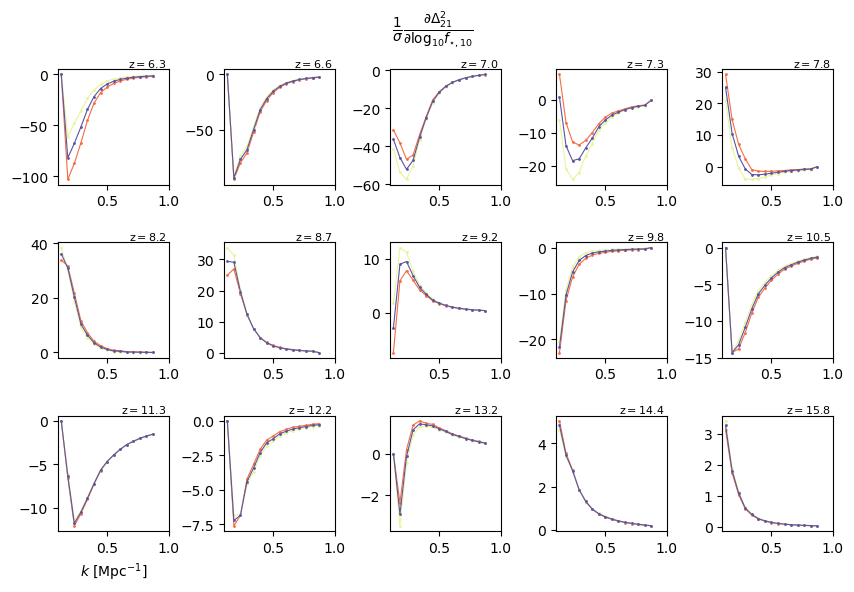

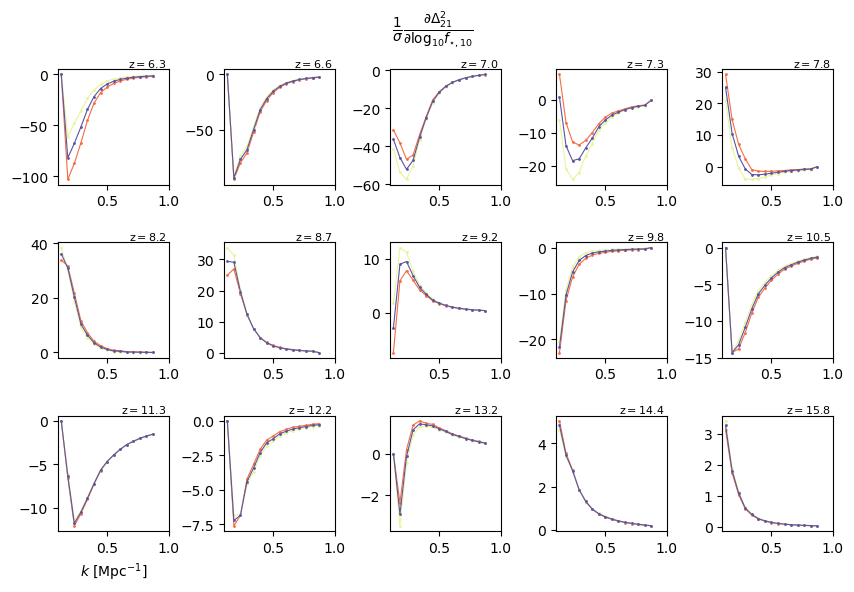

In [46]:
params.append(p21fish.Parameter(fiducial=fiducial, name='ALPHA_STAR'))

In [39]:
fisher_matrix     = p21fish.evaluate_fisher_matrix(params)
covariance_matrix = np.linalg.inv(fisher_matrix['matrix'])

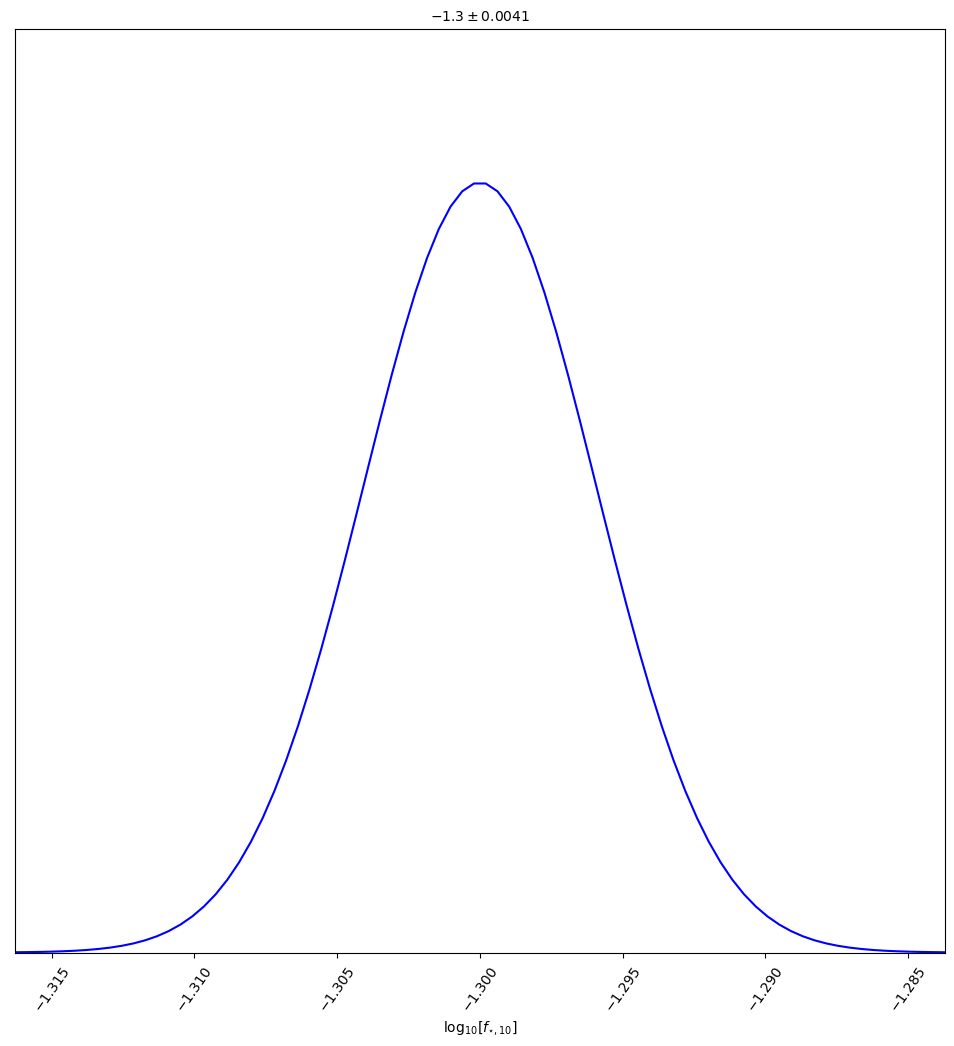

In [40]:
fig = p21fish.make_triangle_plot(covariance_matrix, fisher_matrix['name'], fiducial.astro_params)
fig.savefig(fiducial.dir_path + '/triangle_plot.pdf')

In [42]:
print(fisher_matrix['matrix'])

[[60327.45427446]]


0.004071403405663358